In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

```python
1- Loading the given dataset
```

```python
2- Making "PassengerId" as index column
```

In [185]:
data=pd.read_csv('/home/saf/Desktop/ict py/Datasets/asgnmnt/titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```python
3- To check the basic details of the dataset
```

In [186]:
data.shape

(891, 11)

In [187]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [189]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

```python
4- Fill in all the missing value present in all the columns in dataset
```

In [191]:
data = data.drop('Cabin',axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [192]:
data['Age'] = data['Age'].fillna(data['Age'].median())


In [193]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [194]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [195]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

```python
5- Checking and handle outliers in atleast 3 columns in the dataset
```

**5a - AGE**

Text(0.5, 1.0, 'Boxplot for AGE')

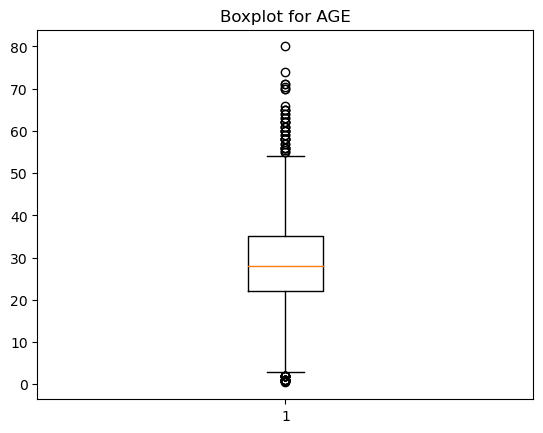

In [196]:
plt.boxplot(data['Age'])
plt.title("Boxplot for AGE")

In [197]:
Q1=np.percentile(data['Age'],25)
Q1

22.0

In [198]:
Q2=np.percentile(data['Age'],50)
Q2

28.0

In [199]:
Q3=np.percentile(data['Age'],75)
Q3

35.0

In [200]:
IQR=Q3-Q1
IQR

13.0

In [201]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [202]:
lower_limit

2.5

In [203]:
upper_limit

54.5

In [204]:
outliers=[]
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outliers.append(x)

In [205]:
index = data[(data["Age"] > upper_limit)|(data["Age"] < lower_limit)].index
print(f"\n{index}")
data.drop(index, inplace=True)


Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165, 171,
       173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306, 327, 341,
       367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493, 494, 531, 546,
       556, 571, 588, 626, 627, 631, 643, 645, 648, 660, 673, 685, 695, 746,
       756, 773, 789, 804, 825, 828, 830, 832, 852, 880],
      dtype='int64', name='PassengerId')


**5b - FARE**

Text(0.5, 1.0, 'Boxplot for FARE')

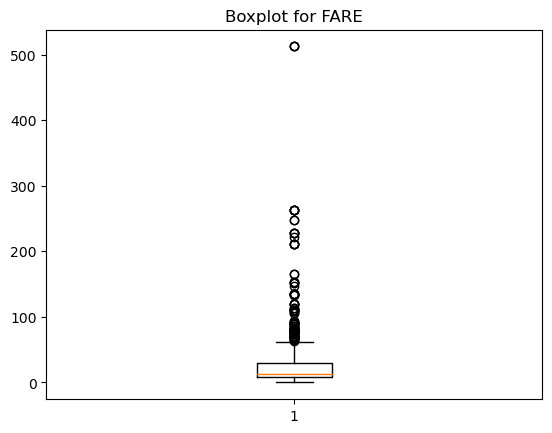

In [206]:
plt.boxplot(data['Fare'])
plt.title("Boxplot for FARE")

In [207]:
Q1=np.percentile(data['Fare'],25)
Q1

7.8958

In [208]:
Q2=np.percentile(data['Fare'],50)
Q2

13.4167

In [209]:
Q3=np.percentile(data['Fare'],75)
Q3

30.0708

In [210]:
IQR = Q3-Q1
IQR

22.174999999999997

In [211]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [212]:
lower_limit

-25.366699999999994

In [213]:
upper_limit

63.333299999999994

In [214]:
outliers=[]
for x in data['Fare']:
    if x>upper_limit or x<lower_limit:
        outliers.append(x)

In [215]:
index = data[(data["Fare"] > upper_limit)|(data["Fare"] < lower_limit)].index
print(f"\n{index}")
data.drop(index, inplace=True)


Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
       ...
       780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
      dtype='int64', name='PassengerId', length=107)


**5c - SibSp**

Text(0.5, 1.0, 'Boxplot for SibSp')

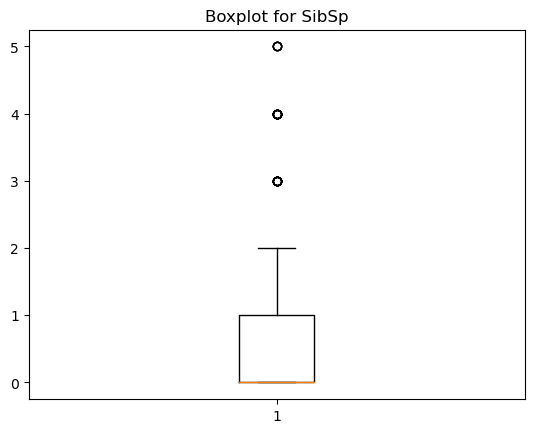

In [216]:
plt.boxplot(data['SibSp'])
plt.title("Boxplot for SibSp")

In [217]:
Q1=np.percentile(data['SibSp'],25)
Q1

0.0

In [218]:
Q2=np.percentile(data['SibSp'],50)
Q2

0.0

In [219]:
Q3=np.percentile(data['SibSp'],75)
Q3

1.0

In [220]:
IQR = Q3-Q1
IQR

1.0

In [221]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [222]:
lower_limit

-1.5

In [223]:
upper_limit

2.5

In [224]:
outliers=[]
for x in data['SibSp']:
    if x>upper_limit or x<lower_limit:
        outliers.append(x)

In [225]:
index = data[(data["Fare"] > upper_limit)|(data["Fare"] < lower_limit)].index
print(f"\n{index}")
data.drop(index, inplace=True)


Index([  1,   3,   4,   5,   6,   7,   9,  10,  11,  13,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=703)


```python
6- Do min-max scaling on the feature set(Take "Survived" as target)
```

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 180 to 823
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  15 non-null     int64  
 1   Pclass    15 non-null     int64  
 2   Name      15 non-null     object 
 3   Sex       15 non-null     object 
 4   Age       15 non-null     float64
 5   SibSp     15 non-null     int64  
 6   Parch     15 non-null     int64  
 7   Ticket    15 non-null     object 
 8   Fare      15 non-null     float64
 9   Embarked  15 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ KB


In [227]:
x = data.drop(["Survived","Name","Sex","Ticket","Embarked"],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
180,3,36.0,0,0,0.0
264,1,40.0,0,0,0.0
272,3,25.0,0,0,0.0
278,2,28.0,0,0,0.0
303,3,19.0,0,0,0.0
414,2,28.0,0,0,0.0
467,2,28.0,0,0,0.0
482,2,28.0,0,0,0.0
598,3,49.0,0,0,0.0


In [228]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)


In [229]:
x = pd.DataFrame(x)

In [230]:
x.columns=['Pclass','Age','SibSp','Parch','Fare']
x

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.566667,0.0,0.0,0.0
1,0.0,0.700000,0.0,0.0,0.0
2,1.0,0.200000,0.0,0.0,0.0
3,0.5,0.300000,0.0,0.0,0.0
4,1.0,0.000000,0.0,0.0,0.0
5,0.5,0.300000,0.0,0.0,0.0
6,0.5,0.300000,0.0,0.0,0.0
7,0.5,0.300000,0.0,0.0,0.0
8,1.0,1.000000,0.0,0.0,0.0
9,0.0,0.300000,0.0,0.0,0.0


In [231]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,15.000000,15.000000,15.0,15.0,15.0
mean,0.466667,0.411111,0.0,0.0,0.0
std,0.399404,0.250924,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.300000,0.0,0.0,0.0
50%,0.500000,0.300000,0.0,0.0,0.0
75%,0.750000,0.600000,0.0,0.0,0.0
max,1.000000,1.000000,0.0,0.0,0.0
